# Random Forest Regressor

In [2]:
# importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('data/Real-Data/Real_Combine.csv')
df.head()

,T,TM,SLP,H,W,V,VM,PM 2.5
0,9.8,4.8,1017.6,93.0,0.5,4.3,9.4,219.720833
1,12.7,4.4,1018.5,87.0,0.6,4.4,11.1,182.187500
2,13.4,2.4,1019.4,82.0,0.6,4.8,11.1,154.037500
3,15.5,3.3,1018.7,72.0,0.8,8.1,20.6,223.208333
4,20.9,4.4,1017.3,61.0,1.3,8.7,22.2,200.645833


In [4]:
# Splitting into independent and dependent

X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [5]:
y.isnull().sum()

2

In [6]:
## Replacing the null values with median
y.fillna(y.median(),inplace=True)

In [7]:
### Train test split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Implementation

In [8]:
from sklearn.ensemble import RandomForestRegressor

regresser=RandomForestRegressor()
regresser.fit(X_train,y_train)

RandomForestRegressor()

In [9]:
print('co-efficient r^2 on train: {}'.format(regresser.score(X_train,y_train)))

co-efficient r^2 on train: 0.9396672373649867


In [10]:
print('co-efficient r^2 on test: {}'.format(regresser.score(X_test,y_test)))

co-efficient r^2 on test: 0.6260471054549535


In [11]:
from sklearn.model_selection import cross_val_score

score=cross_val_score(regresser,X,y,cv=5)
score.mean()

0.48932846263690655

In [12]:
### Evaluation

In [13]:
prediction=regresser.predict(X_test)

C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

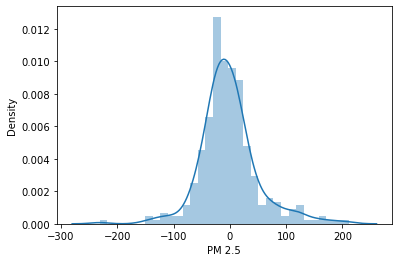

In [14]:
#### distplot

sns.distplot(y_test-prediction)

C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM 2.5'>

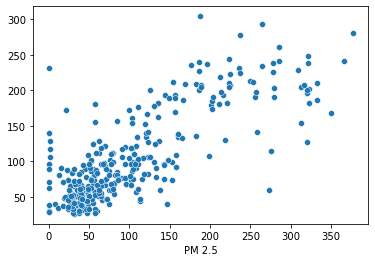

In [15]:
#### scatter

sns.scatterplot(y_test,prediction)

In [16]:
from sklearn.metrics import r2_score
print('r2 score: {}'.format(r2_score(y_test,prediction)))

r2 score: 0.6260471054549535


### Hyperparameter tuning

In [17]:
RandomForestRegressor()

RandomForestRegressor()

In [18]:
# Randomized Search cv
from sklearn.model_selection import RandomizedSearchCV

#number of trees in random forest
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200, num=12)]

# Number of features to consider at every split
max_features=['auto','squrt']

#Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=6)]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split=[2,5,10,15,100]

#Minimum number of samples required at each leaf node
min_samples_leaf=[1,2,5,10]


In [19]:
random_grid={
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'squrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [20]:
# base model to tune

rf=RandomForestRegressor()

In [21]:
rf_random=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=100,cv=5,verbose=2,random_state=42)

In [22]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=5, max_features=squrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.0s
[CV] END max_depth=5, max_features=squrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.0s
[CV] END max_depth=5, max_features=squrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.0s
[CV] END max_depth=5, max_features=squrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.0s
[CV] END max_depth=5, max_features=squrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5,

[CV] END max_depth=20, max_features=squrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   0.1s
[CV] END max_depth=20, max_features=squrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   0.1s
[CV] END max_depth=20, max_features=squrt, min_samples_leaf=2, min_samples_split=5, n_estimators=900; total time=   0.1s
[CV] END max_depth=10, max_features=squrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=squrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=squrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=squrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_features=squrt, min_samples_leaf=2, min_samples_split=15, n_estimators=200; total time=   0.0s
[CV] END max_depth=10, max_

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=100, n_estimators=300; total time=   0.3s
[CV] END max_depth=20, max_features=squrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=squrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_features=squrt, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=20, max_

[CV] END max_depth=30, max_features=squrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.1s
[CV] END max_depth=30, max_features=squrt, min_samples_leaf=1, min_samples_split=10, n_estimators=600; total time=   0.1s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.7s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=900; total time=   1.7s
[CV] END max_depth=15, max_features=squrt, min_samples_leaf=5, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=15, max_fea

[CV] END max_depth=30, max_features=squrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.0s
[CV] END max_depth=30, max_features=squrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.0s
[CV] END max_depth=30, max_features=squrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.0s
[CV] END max_depth=30, max_features=squrt, min_samples_leaf=5, min_samples_split=10, n_estimators=400; total time=   0.0s
[CV] END max_depth=10, max_features=squrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   0.2s
[CV] END max_depth=10, max_features=squrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   0.2s
[CV] END max_depth=10, max_features=squrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   0.7s
[CV] END max_depth=10, max_features=squrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1200; total time=   0.6s
[CV] END max_depth=1

[CV] END max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=700; total time=   1.5s
[CV] END max_depth=20, max_features=squrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.0s
[CV] END max_depth=20, max_features=squrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.0s
[CV] END max_depth=20, max_features=squrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.0s
[CV] END max_depth=20, max_features=squrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.0s
[CV] END max_depth=20, max_features=squrt, min_samples_leaf=10, min_samples_split=100, n_estimators=500; total time=   0.0s
[CV] END max_depth=30, max_features=squrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.1s
[CV] END max_depth=30, max_features=squrt, min_samples_leaf=10, min_samples_split=2, n_estimators=600; total time=   0.1s
[CV] END max_dep

[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.4s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1200; total time=   2.3s
[CV] END max_depth=5, max_f

[CV] END max_depth=20, max_features=squrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   0.2s
[CV] END max_depth=20, max_features=squrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   0.2s
[CV] END max_depth=20, max_features=squrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   0.2s
[CV] END max_depth=20, max_features=squrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   0.2s
[CV] END max_depth=20, max_features=squrt, min_samples_leaf=10, min_samples_split=100, n_estimators=1100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=   0.5s
[CV] END max_de

C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
340 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
340 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(i

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=100,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'squrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [23]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 5}

In [24]:
rf_random.best_score_

-2884.7250575592216

In [25]:
prediction=rf_random.predict(X_test)

C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PM 2.5'>

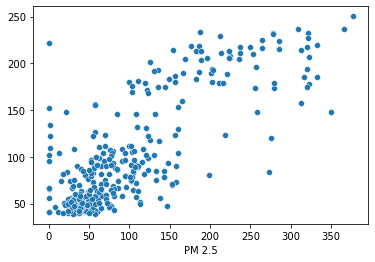

In [26]:
# scatterplot

sns.scatterplot(y_test,prediction)

C:\Users\BRAG\anaconda3\envs\airquality\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

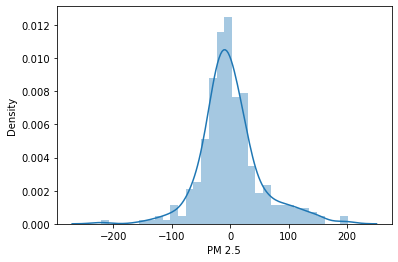

In [27]:
# distplot

sns.distplot(y_test-prediction)

### Evaluation metrics

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,r2_score

print('MAE: {}'.format(mean_absolute_error(y_test,prediction)))
print('MSE: {}'.format(mean_squared_error(y_test,prediction)))
print('RMSE: {}'.format(np.sqrt(mean_squared_error(y_test,prediction))))
print('r2 score: {}'.format(r2_score(y_test,prediction)))

MAE: 36.22558767229152
MSE: 2688.1736165865
RMSE: 51.847599911534
r2 score: 0.6246287204294707


In [33]:
# Creating Pickle
import pickle

file=open('rf_regresser.pkl','wb')
pickle.dump(rf_random,file)

In [34]:
file.close()